In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Read data

df = pd.read_csv('Medical_insurance.csv')

In [ ]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1311,33,female,26.695,0,no,northwest,4571.41305
539,53,male,31.350,0,no,southeast,27346.04207
1854,28,female,24.320,1,no,northeast,23288.92840
1272,43,male,25.520,5,no,southeast,14478.33015
1358,32,male,33.630,1,yes,northeast,37607.52770
1609,19,male,34.800,0,yes,southwest,34779.61500
1213,52,female,33.300,2,no,southwest,10806.83900
1112,48,female,25.850,3,yes,southeast,24180.93350
759,18,male,38.170,0,yes,southeast,36307.79830
2397,43,male,20.130,2,yes,southeast,18767.73770


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df['region'].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='region', ylabel='charges'>

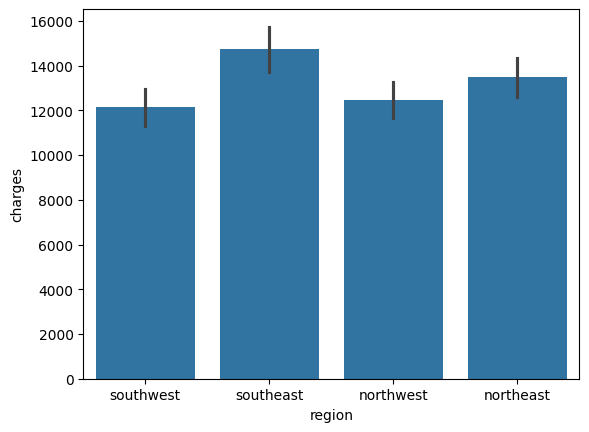

In [ ]:
# EDA

sns.barplot(data = df, y = 'charges', x = 'region')

<Axes: xlabel='sex', ylabel='charges'>

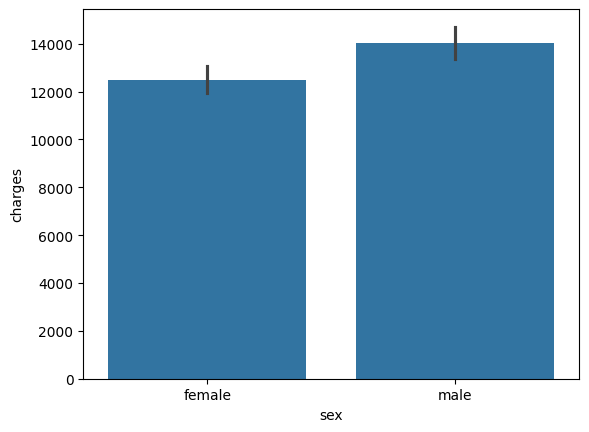

In [ ]:
sns.barplot(data = df, x = 'sex', y = 'charges')

<Axes: xlabel='smoker', ylabel='charges'>

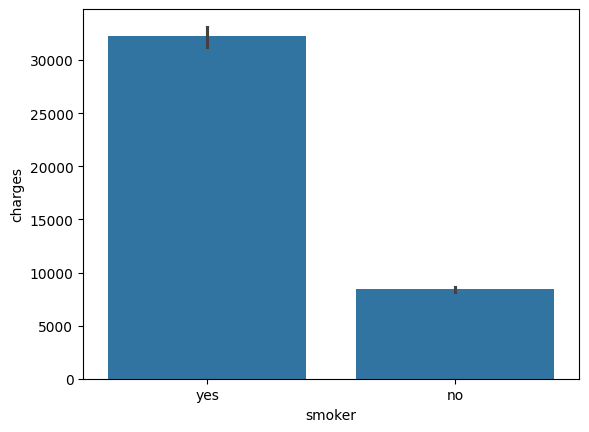

In [ ]:
sns.barplot(data = df, y = 'charges', x = 'smoker')

<Axes: xlabel='children', ylabel='charges'>

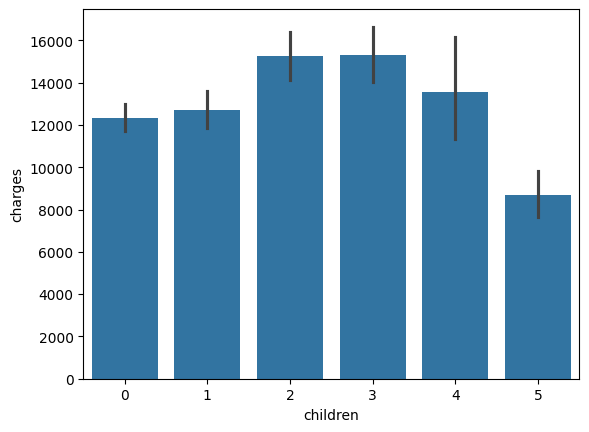

In [ ]:
sns.barplot(data = df, y = 'charges', x = 'children')

<Axes: xlabel='children', ylabel='charges'>

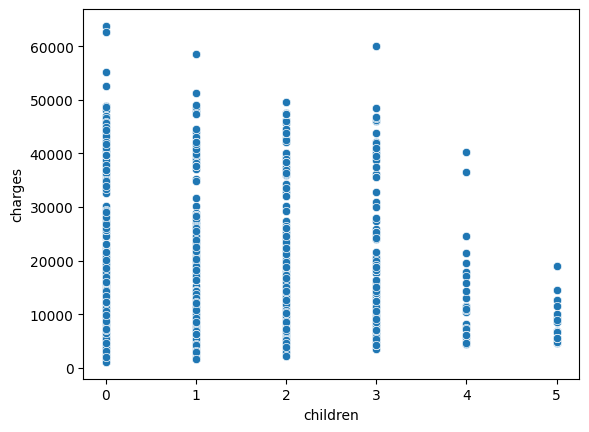

In [ ]:
sns.scatterplot(data = df, y = 'charges', x = 'children')

<ipython-input-12-8b719cae13db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'age', y = 'charges', palette = 'coolwarm')


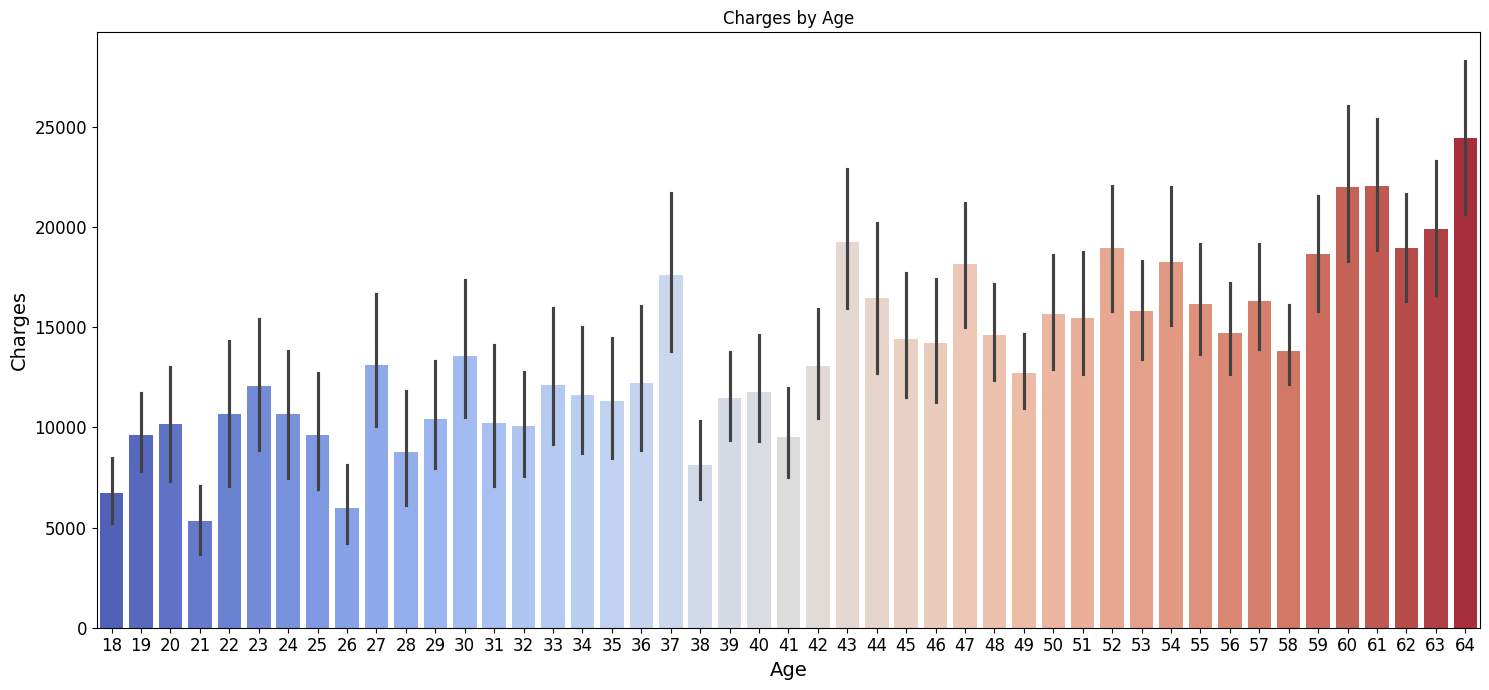

In [ ]:
plt.figure(figsize = (15, 7))
plt.title('Charges by Age', fontsize = 12)
sns.barplot(data = df, x = 'age', y = 'charges', palette = 'coolwarm')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Charges', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [ ]:
age_bins=[0,20,30,40,50,60,100]
age_labels=['0-20','21-30','31-40','41-50','51-60','61+']
df['age_group']=pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-20
1,18,male,33.770,1,no,southeast,1725.55230,0-20
2,28,male,33.000,3,no,southeast,4449.46200,21-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40


<ipython-input-14-3cb75e524ba9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'age_group', y = 'charges', palette = 'coolwarm')


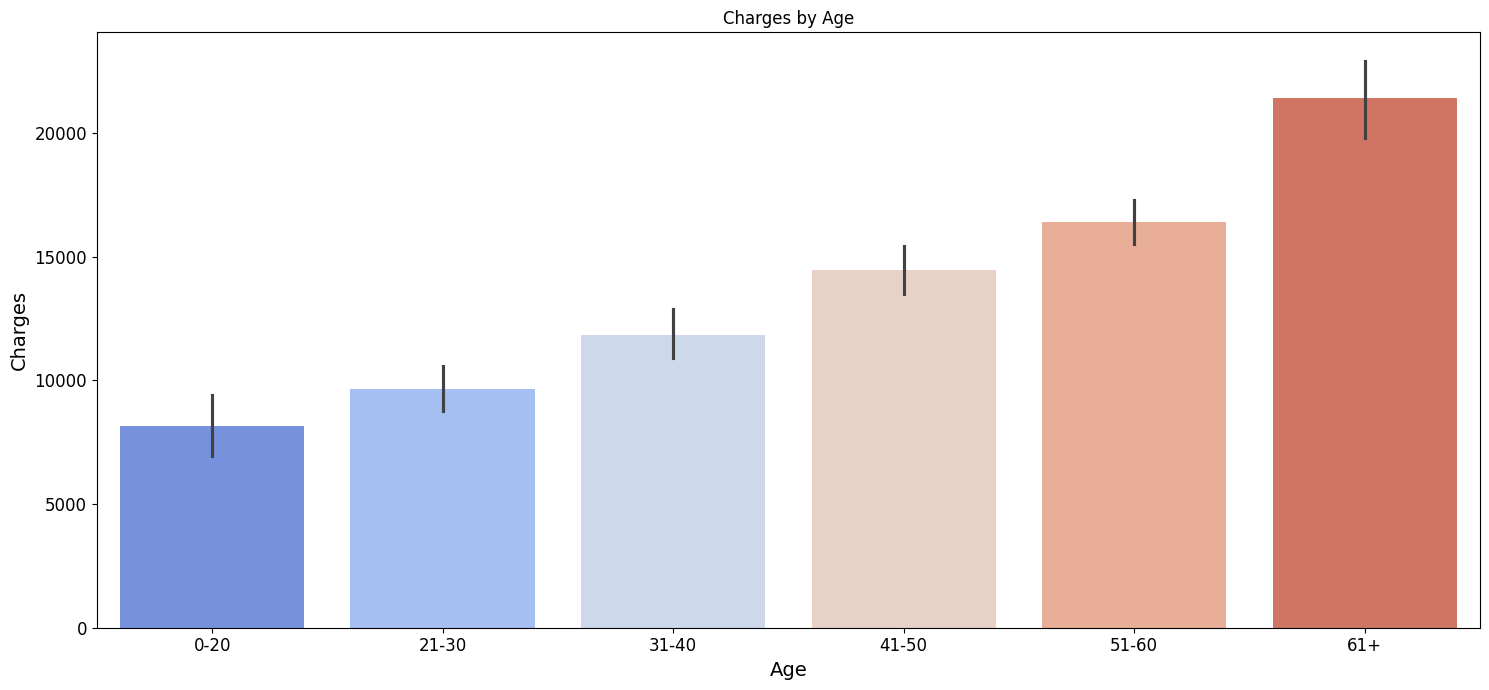

In [ ]:
plt.figure(figsize = (15, 7))
plt.title('Charges by Age', fontsize = 12)
sns.barplot(data = df, x = 'age_group', y = 'charges', palette = 'coolwarm')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Charges', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-20
1,18,male,33.770,1,no,southeast,1725.55230,0-20
2,28,male,33.000,3,no,southeast,4449.46200,21-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40


In [ ]:
bmi_bins = [0, 18.5, 25, 30, 35, 40, 50]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class 1', 'Obese Class 2', 'Obese Class 3']

df['bmi_group'] = pd.cut(df['bmi'], bins = bmi_bins, labels = bmi_labels, right = False)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0-20,Obese Class 1
2,28,male,33.000,3,no,southeast,4449.46200,21-30,Obese Class 1
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight


<ipython-input-17-f15a1da5a32a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'bmi_group', y = 'charges', palette = 'coolwarm')


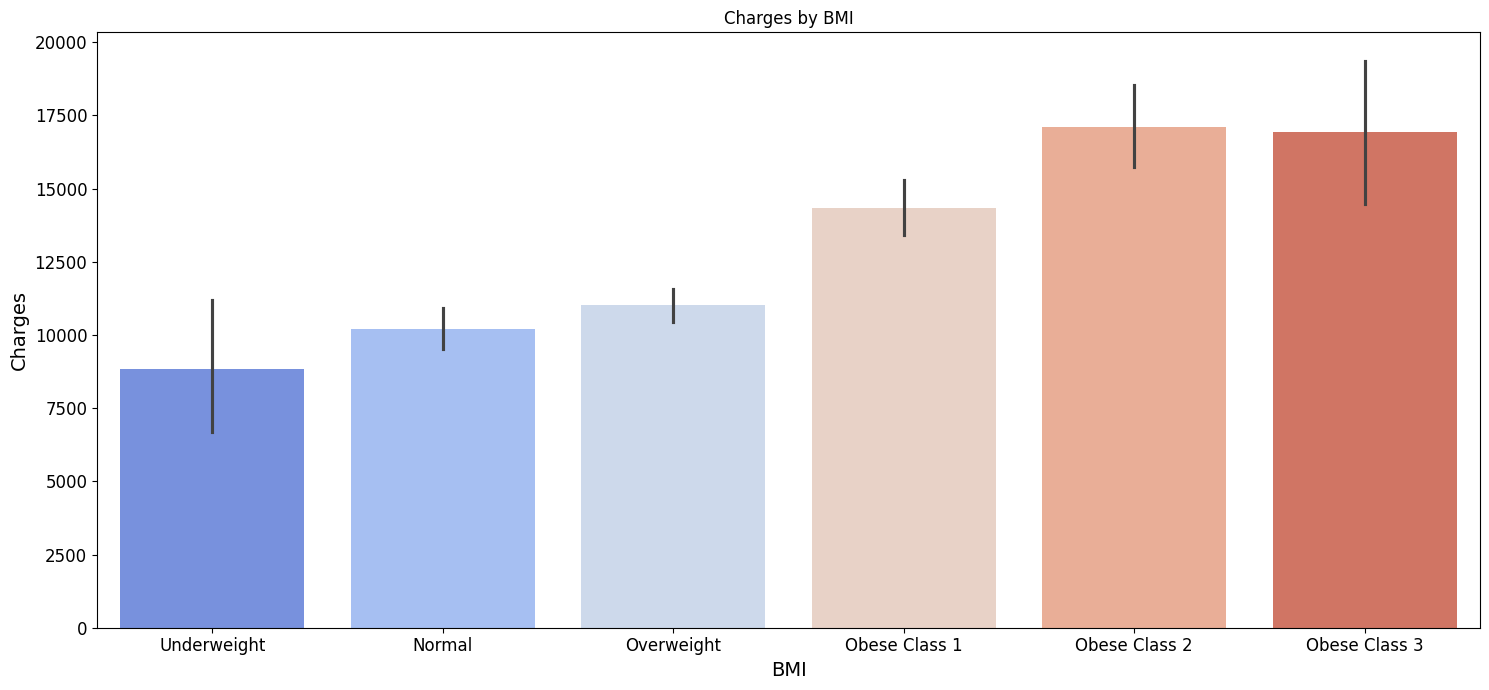

In [ ]:
plt.figure(figsize = (15, 7))
plt.title('Charges by BMI', fontsize = 12)
sns.barplot(data = df, x = 'bmi_group', y = 'charges', palette = 'coolwarm')
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Charges', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [ ]:
corr_mat = df.corr(numeric_only = True)

In [ ]:
corr_mat

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


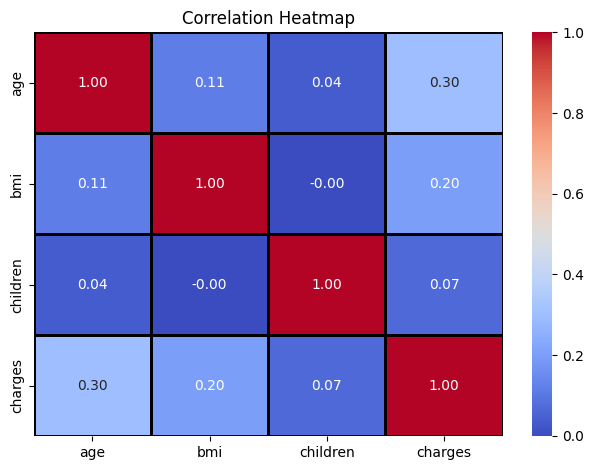

In [ ]:
plt.title('Correlation Heatmap')
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', linewidths = 1,
            linecolor = 'black', fmt = '.2f')
plt.tight_layout()
plt.show()

In [ ]:
# ML Model

df = df.iloc[:, 0:7]

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [ ]:
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df.drop(columns = 'region', inplace = True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
X = df.drop(columns = ['charges', 'children'])
y = df['charges']

In [ ]:
X

,age,sex,bmi,smoker
0,19,0,27.900,1
1,18,1,33.770,0
2,28,1,33.000,0
3,33,1,22.705,0
4,32,1,28.880,0
...,...,...,...,...
2767,47,0,45.320,0
2768,21,0,34.600,0
2769,19,1,26.030,1
2770,23,1,18.715,0


In [ ]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
2767,8569.86180
2768,2020.17700
2769,16450.89470
2770,21595.38229


In [ ]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
df = pd.merge(X_test, y_test, how = 'inner', left_index = True, right_index = True)

In [ ]:
df

,age,sex,bmi,smoker,charges
1106,49,0,29.925,0,8988.15875
1321,62,1,26.695,1,28101.33305
2313,57,0,20.100,0,12032.32600
2274,22,1,39.500,0,1682.59700
1432,18,0,38.665,0,3393.35635
...,...,...,...,...,...
930,26,1,46.530,0,2927.06470
2610,41,1,23.940,0,6858.47960
1700,27,0,31.400,1,34838.87300
100,41,0,31.600,0,6186.12700


In [ ]:
# Model Creation

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [ ]:
y_pred

array([ 8208.866 , 28281.443 , 12411.956 ,  2484.04  ,  4179.508 ,
       23820.217 , 10064.888 , 47277.28  , 17908.115 ,  2938.1943,
       14476.838 , 11173.128 ,  4170.488 , 15155.406 ,  4808.177 ,
        4821.9966, 22292.162 ,  9943.785 ,  4616.566 , 18712.455 ,
       10646.092 , 58448.996 , 19039.316 , 48907.285 , 33888.445 ,
        9983.272 ,  1666.0093, 14284.105 , 20828.918 ,  1674.9722,
       11606.611 ,  3315.7192,  2014.4746, 11833.244 , 25607.422 ,
       10744.232 ,  1929.0712,  4579.5693,  6861.503 , 21049.748 ,
        3469.7993,  6861.503 ,  8408.9795,  3356.228 ,  1763.9034,
       49654.395 ,  4296.568 , 43614.72  ,  4647.694 ,  6560.3623,
       43987.016 ,  9850.759 ,  2571.2847,  4497.454 ,  3268.545 ,
       11828.5625,  4144.5796,  2082.3582,  5778.0107,  8545.8955,
       15020.56  , 14011.46  , 19423.793 ,  1240.2092, 11110.967 ,
       13035.919 ,  3320.8208,  3927.5547,  6913.915 , 10064.888 ,
        7571.293 ,  7138.759 ,  7113.967 , 14276.916 , 12583.8

In [ ]:
df['Prediction-XGB'] = xgb.predict(X_test)

In [ ]:
df.sample(10)

,age,sex,bmi,smoker,charges,Prediction-XGB
1123,27,0,32.395,0,18903.49141,6735.428711
2519,52,0,18.335,0,9991.03765,12783.463867
644,43,1,35.310,0,18806.14547,12491.090820
1512,19,0,28.300,1,17081.08000,16965.326172
602,56,0,25.300,0,11070.53500,11445.224609
238,19,1,29.070,1,17352.68030,17406.519531
358,23,1,41.910,0,1837.28190,2258.795898
196,39,0,32.800,0,5649.71500,7113.966797
2669,18,1,30.030,0,1720.35370,11833.244141
817,23,1,37.100,0,3597.59600,3356.228027


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print('Mean Absolute Error: ', '${:.2f}'.format(mae))

0.9438202434472045
Mean Absolute Error:  $1455.25


In [ ]:
# Grid SearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9]
}

In [ ]:
Grid = GridSearchCV(xgb, param_grid, cv = 10, scoring = 'neg_mean_absolute_error')

In [ ]:
Grid

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_absolute_error')

In [ ]:
Grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_absolute_error')

In [ ]:
best_params = Grid.best_params_
best_score = np.abs(Grid.best_score_)

In [ ]:
print(best_params)
print(best_score)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
867.6038782556083


In [ ]:
xgb = XGBRegressor(learning_rate = 0.1, max_depth = 9, n_estimators = 500)

In [ ]:
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred1 = xgb.predict(X_test)

In [ ]:
y_pred1

array([ 8964.292 , 28116.172 , 12033.203 ,  1692.1492,  3420.4834,
       24107.287 ,  6951.1978, 47277.363 , 16958.21  ,  2662.6396,
       13643.551 , 10654.298 ,  2562.6985, 20711.396 ,  4358.271 ,
        6689.012 , 30104.387 ,  9855.268 ,  3878.6956, 23935.354 ,
       10442.597 , 58572.363 , 19591.756 , 48825.934 , 33907.91  ,
        8669.29  ,  1599.1671, 14212.297 , 24569.328 ,  1130.3816,
       10613.159 ,  4352.0967,  1652.2394, 12142.264 , 28233.242 ,
       11955.716 ,  1723.82  ,  6664.498 ,  7331.978 , 21228.139 ,
        3501.7764,  7331.978 ,  9645.621 ,  3563.4211,  2113.9724,
       49582.39  ,  3607.176 , 42193.355 ,  4265.535 ,  6144.9497,
       43894.277 ,  9321.278 ,  2767.871 ,  4740.2837,  3982.3223,
       12306.146 ,  3753.3545,  1839.0249,  6295.806 ,  8559.076 ,
       17825.094 , 16535.94  , 25405.479 ,  1309.475 , 10992.857 ,
       12019.304 ,  4634.205 ,  3752.3176,  6407.255 ,  6951.1978,
        7487.493 ,  8115.0674,  7061.671 , 14320.335 , 11129.1

In [ ]:
df['Prediction-XGB-GridSearchCV'] = xgb.predict(X_test)

In [ ]:
    df.sample(10)

,age,sex,bmi,smoker,charges,Prediction-XGB,Prediction-XGB-GridSearchCV
2010,59,1,28.785,0,12129.61415,11870.216797,12175.444336
422,40,1,32.775,1,39125.33225,39251.796875,39188.503906
1486,41,0,31.600,0,6186.12700,6861.502930,7331.978027
257,38,0,40.150,0,5400.98050,6131.076660,5406.218750
1210,36,1,30.875,0,5373.36425,5240.576172,5368.796875
1902,20,1,35.310,0,27724.28875,23257.751953,27661.789062
173,35,0,34.800,0,5246.04700,5931.640137,5328.937500
685,53,1,26.410,0,11244.37690,9392.906250,8957.201172
1321,62,1,26.695,1,28101.33305,28281.443359,28116.171875
321,26,0,29.640,0,24671.66334,18653.343750,24570.386719


In [ ]:
mae1 = mean_absolute_error(y_test, y_pred1)
print(r2_score(y_test, y_pred1))
print('Mean Absolute Error: ', '${:.2f}'.format(mae1))

0.9606296351458667
Mean Absolute Error:  $730.87


In [ ]:
xgb.predict(pd.DataFrame([[25, 1, 24, 0]], columns = ['age', 'sex', 'bmi', 'smoker']))

array([5077.7227], dtype=float32)

In [ ]:
xgb.predict(pd.DataFrame([[40, 1, 30, 1]], columns = ['age', 'sex', 'bmi', 'smoker']))

array([22421.074], dtype=float32)

In [ ]:
xgb.predict(pd.DataFrame([[25, 0, 24, 0]], columns = ['age', 'sex', 'bmi', 'smoker']))

array([4426.3955], dtype=float32)

In [ ]:
xgb.predict(pd.DataFrame([[65, 1, 35, 1]], columns = ['age', 'sex', 'bmi', 'smoker']))

array([46803.496], dtype=float32)

In [ ]:
# Actionable insights--->Analyse the data and predict the medical insurance charges according to person age.